In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')


import os

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/notagain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/notagain/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/notagain/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/notagain/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /Users/notagain/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [85]:
df = pd.read_csv(
    "/Users/notagain/Desktop/Trust_pilot-1/fabian/EDA/trustpilot_reviews.csv",
    usecols=['review_title', 'cust_rating', 'cust_review_text', "company"]
)
df = df.rename(columns={
    'review_title': 'review',
    'cust_rating': 'rating',
    'cust_review_text': 'text'
})
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head()

,review,rating,text,company
0,PERFECTION,5,First: you had the books I wanted for a gift t...,bookshop.org
1,Good book buying experience,5,Great communication about my order. Books arri...,bookshop.org
2,I appreciate the selection and the…,5,I appreciate the selection and the prices of t...,bookshop.org
3,The books arrived in a very timely…,5,The books arrived in a very timely fashion and...,bookshop.org
4,"Quick delivery, fab products",5,Beautiful books delivered extremely quickly co...,bookshop.org


In [86]:
df.to_csv('text.csv')


In [65]:
example = df['text'][50]

tokens = nltk.word_tokenize(example)


In [66]:
# https://www.learntek.org/blog/categorizing-pos-tagging-nltk-python/
# https://www.guru99.com/pos-tagging-chunking-nltk.html


tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('entered', 'VBD'),
 ('in', 'IN'),
 ('all', 'PDT'),
 ('the', 'DT'),
 ('detailed', 'JJ'),
 ('information', 'NN'),
 ('about', 'IN'),
 ('my', 'PRP$'),
 ('wife', 'NN')]

In [67]:
entities = nltk.chunk.ne_chunk(tagged)
entities[:5]

[('I', 'PRP'), ('entered', 'VBD'), ('in', 'IN'), ('all', 'PDT'), ('the', 'DT')]

VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach  



does not account for relationships between words

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [ ]:

sia = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/notagain/nltk_data...


In [54]:
sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [55]:
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [56]:
sia.polarity_scores(example)


{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9582}

In [68]:
df[['text', "rating"]].iloc[50]

text      I entered in all the detailed information abou...
rating                                                    5
Name: 50, dtype: object

In [71]:
df['polarity_scores'] = df['text'].progress_apply(sia.polarity_scores)


100%|██████████| 139970/139970 [01:04<00:00, 2177.75it/s]


In [73]:
vaders = pd.concat([df.drop(columns=['polarity_scores']), df['polarity_scores'].apply(pd.Series)], axis=1)


vaders = vaders.rename(columns={'Id': 'index'}).reset_index()

In [75]:
vaders.drop(columns=['index'], inplace=True)

In [76]:
vaders

,review,rating,text,neg,neu,pos,compound
0,PERFECTION,5,First: you had the books I wanted for a gift t...,0.000,0.644,0.356,0.9134
1,Good book buying experience,5,Great communication about my order. Books arri...,0.000,0.542,0.458,0.9348
2,I appreciate the selection and the…,5,I appreciate the selection and the prices of t...,0.000,0.741,0.259,0.8799
3,The books arrived in a very timely…,5,The books arrived in a very timely fashion and...,0.106,0.694,0.201,0.3804
4,"Quick delivery, fab products",5,Beautiful books delivered extremely quickly co...,0.000,0.642,0.358,0.7713
...,...,...,...,...,...,...,...
139965,Pleasant clean atmosphere,5,Pleasant clean atmosphere. More cheerful than ...,0.000,0.529,0.471,0.9696
139966,Dustin took a lot of time to answer…,5,Dustin took a lot of time to answer questions ...,0.000,0.740,0.260,0.8991
139967,Great communication,5,Great communication! Fabulous product!!!! I ...,0.000,0.600,0.400,0.8647
139968,CBD Lawrence is amazing,5,CBD Lawrence are amazing! They have all the CB...,0.000,0.687,0.313,0.9380


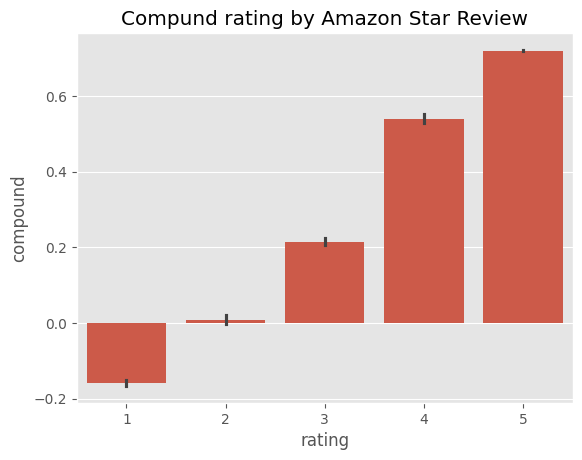

In [78]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund rating by Amazon Star Review')
plt.show()

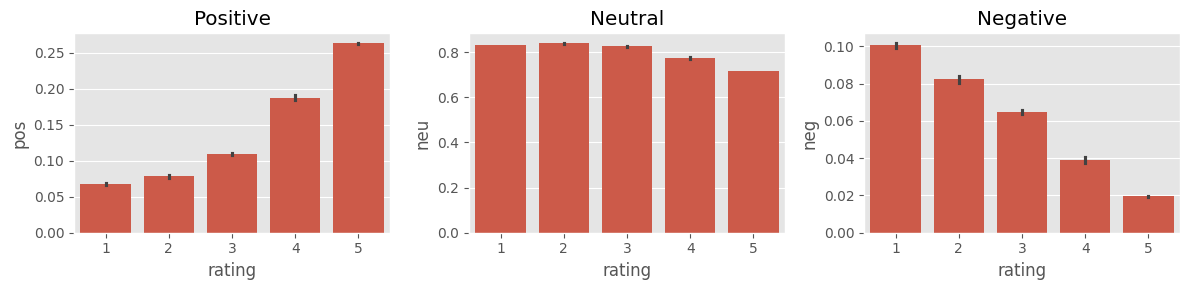

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Negative sentiment decreases with rating, just as positivity increases with rating, and neutral stays the same.

# Roberta

In [82]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [83]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


In [84]:
import torch


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/Caskroom/miniconda/base/envs/trust/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/usr/local/Caskroom/miniconda/base/envs/trust/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/usr/local/Caskroom/miniconda/base/envs/trust/lib/python3.12/site-packages/ipykernel/kernelapp